<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20full4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 491kB 54.7MB/s 
     |████████████████████████████████| 3.2MB 52.9MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [3]:
import os
os.chdir('/content/drive/My Drive/Raw_PCB')
os.getcwd()

'/content/drive/My Drive/Raw_PCB'

In [4]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(2669, 300, 300, 3)
(2669,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [7]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1788, 300, 300, 3)
(1788,)
(881, 300, 300, 3)
(881,)
4
uint8
4
uint8
4
uint8


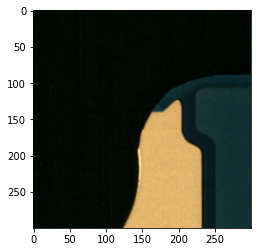

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [10]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788,)


In [11]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
50.869766
53.660957
3.8040736 3.8040736
-0.9479847 -0.9479847


In [12]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

[0. 1.]


In [13]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [28]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))
x0=keras.layers.ZeroPadding2D(padding=(3, 3))(input1)

x1 = Conv2D(20,(4,4),strides=(2,2) ,activation='relu')(x0)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(20,(2,2),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)


x9= Conv2D(20,(2,2),strides=(2,2) ,activation='relu')(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= MaxPooling2D((3, 3), strides=(2, 2))(x11)






o=keras.layers.Flatten()(x11)








out = keras.layers.Dense(50,activation="relu")(o)
out=keras.layers.Dropout(0.4)(out)
out = keras.layers.Dense(50,activation="relu")(out)
out=keras.layers.Dropout(0.2)(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 306, 306, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 152, 152, 20)      980       
_________________________________________________________________
batch_normalization_10 (Batc (None, 152, 152, 20)      80        
_________________________________________________________________
activation_10 (Activation)   (None, 152, 152, 20)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 20)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 20)        1620

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [16]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [24]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, batch_size=60,epochs=40, verbose=1)

Epoch 1/40
1788/1788 [==============================] - 67s 38ms/step - loss: 0.3273 - acc: 0.8775
Epoch 2/40
1788/1788 [==============================] - 67s 37ms/step - loss: 0.2415 - acc: 0.9379
Epoch 3/40
1788/1788 [==============================] - 67s 37ms/step - loss: 0.2046 - acc: 0.9407
Epoch 4/40
1788/1788 [==============================] - 66s 37ms/step - loss: 0.1881 - acc: 0.9446
Epoch 5/40
1788/1788 [==============================] - 68s 38ms/step - loss: 0.1666 - acc: 0.9435
Epoch 6/40
1788/1788 [==============================] - 66s 37ms/step - loss: 0.1670 - acc: 0.9469
Epoch 7/40
1788/1788 [==============================] - 67s 37ms/step - loss: 0.1698 - acc: 0.9463
Epoch 8/40
1788/1788 [==============================] - 67s 37ms/step - loss: 0.1487 - acc: 0.9446
Epoch 9/40
1788/1788 [==============================] - 67s 37ms/step - loss: 0.1458 - acc: 0.9480
Epoch 10/40
1788/1788 [==============================] - 67s 37ms/step - loss: 0.1328 - acc: 0.9480
Epoch 11/

In [25]:
model.evaluate(xtest,ytest)

881/881 [==============================] - 16s 18ms/step


[0.2128672749269225, 0.9432463110102156]

In [26]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.08      0.14        53
     class 1       0.94      1.00      0.97       828

    accuracy                           0.94       881
   macro avg       0.87      0.54      0.55       881
weighted avg       0.94      0.94      0.92       881



In [0]:
model.evaluate(xtrain,ytrain)

In [27]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.81      0.90        96
     class 1       0.99      1.00      0.99      1692

    accuracy                           0.99      1788
   macro avg       0.99      0.91      0.95      1788
weighted avg       0.99      0.99      0.99      1788



In [0]:
import os
os.chdir('/content/drive/My Drive/Aug_PCB')
os.getcwd()

In [0]:
import numpy as np
xtest=np.load("s_x_train.npy")
ytest=np.load("s_y_train.npy")
xtest  = xtest.astype('float32')


mean = np.mean(xtest)
std  = np.std(xtest)

print(mean)
print(std)


xtest -= mean
xtest /= std
ytest  =  to_categorical(ytest)
print(ytest[0])
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))